In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print("Размерность признаков X:", X.shape)
print("Размерность целевой переменной y:", y.shape)
print("\nПервые 5 строк признаков X:")
print(X.head())
print("\nРаспределение классов в y:")
print(y.value_counts())

# Проверка на пропуски
print("\nПропуски в данных X:")
print(X.isnull().sum().sum()) # Сумма всех пропусков

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nРазмер обучающей выборки: {X_train.shape[0]} примеров")
print(f"Размер тестовой выборки: {X_test.shape[0]} примеров")

# Масштабирование числовых признаков
# Логистическая регрессия чувствительна к масштабу признаков,
# градиентный бустинг менее чувствителен, но масштабирование не повредит.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame для удобства (опционально, но полезно для некоторых проверок)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nПервые 5 строк масштабированных тренировочных данных:")
print(X_train_scaled_df.head())

Размерность признаков X: (178, 13)
Размерность целевой переменной y: (178,)

Первые 5 строк признаков X:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39  

Метод 1: Логистическая регрессия
Логистическая регрессия — это линейный метод классификации. Для мультиклассовой классификации часто используется стратегия "один против всех" (OvR) или мультиномиальная логистическая регрессия.


--- Логистическая регрессия ---
Accuracy (Логистическая регрессия): 0.9815
F1-score (macro, Логистическая регрессия): 0.9829

Отчет по классификации (Логистическая регрессия):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Матрица ошибок (Логистическая регрессия):


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


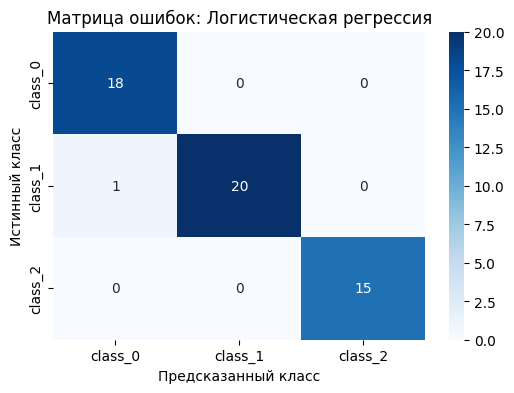

In [2]:
# --- Модель 1: Логистическая регрессия ---
print("\n--- Логистическая регрессия ---")
log_reg = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=42, max_iter=1000) # liblinear хорошо работает на небольших датасетах
log_reg.fit(X_train_scaled, y_train)

# Предсказания
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Оценка качества
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg_macro = f1_score(y_test, y_pred_log_reg, average='macro')
# f1_log_reg_weighted = f1_score(y_test, y_pred_log_reg, average='weighted') # еще один вариант f1

print(f"Accuracy (Логистическая регрессия): {accuracy_log_reg:.4f}")
print(f"F1-score (macro, Логистическая регрессия): {f1_log_reg_macro:.4f}")
# print(f"F1-score (weighted, Логистическая регрессия): {f1_log_reg_weighted:.4f}")

print("\nОтчет по классификации (Логистическая регрессия):")
print(classification_report(y_test, y_pred_log_reg, target_names=wine.target_names))

print("\nМатрица ошибок (Логистическая регрессия):")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Матрица ошибок: Логистическая регрессия')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

Метод 2: Градиентный бустинг
Градиентный бустинг — это мощный ансамблевый метод, который строит модели последовательно, каждая новая модель исправляет ошибки предыдущей.


--- Градиентный бустинг ---
Accuracy (Градиентный бустинг): 0.9630
F1-score (macro, Градиентный бустинг): 0.9652

Отчет по классификации (Градиентный бустинг):
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54


Матрица ошибок (Градиентный бустинг):


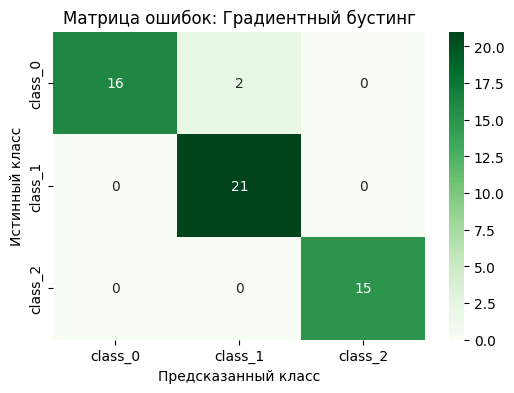

In [3]:
# --- Модель 2: Градиентный бустинг ---
print("\n--- Градиентный бустинг ---")
grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
grad_boost.fit(X_train_scaled, y_train) # Можно использовать и не масштабированные данные, но для единообразия используем масштабированные

# Предсказания
y_pred_grad_boost = grad_boost.predict(X_test_scaled)

# Оценка качества
accuracy_grad_boost = accuracy_score(y_test, y_pred_grad_boost)
f1_grad_boost_macro = f1_score(y_test, y_pred_grad_boost, average='macro')
# f1_grad_boost_weighted = f1_score(y_test, y_pred_grad_boost, average='weighted')

print(f"Accuracy (Градиентный бустинг): {accuracy_grad_boost:.4f}")
print(f"F1-score (macro, Градиентный бустинг): {f1_grad_boost_macro:.4f}")
# print(f"F1-score (weighted, Градиентный бустинг): {f1_grad_boost_weighted:.4f}")

print("\nОтчет по классификации (Градиентный бустинг):")
print(classification_report(y_test, y_pred_grad_boost, target_names=wine.target_names))

print("\nМатрица ошибок (Градиентный бустинг):")
cm_grad_boost = confusion_matrix(y_test, y_pred_grad_boost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_grad_boost, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Матрица ошибок: Градиентный бустинг')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()